# Statistics and Probability for Data Science

The work done in the name of data science has roots in various fields, including computer science, mathematics, and statistics. Broadly speaking, **statistics** involves collecting and analyzing data to find useful information, with the goal of making decisions based off that knowledge.

There are two major areas in the field of statistics:

1. **Descriptive statistics**, which covers collecting and organizing data and usually performing general calculations to measure central tendency and variability (or spread) of that data
2. **Inferential statistics**, which are procedures to understand relationships, draw conclusions, or make predictions about a population based on sample data from that population

A **population** is the set of all measurements of interest, and a number describing a population is a **parameter**. A **sample** is any small group of individuals or objects selected to represent the entire group (the population), where a number describing a sample is a **statistic**. Often, the population parameters are unknown, hence the need to use sample data to make inferences about it.

A number of inferential statistics techniques rely on **probability theory**, which is a branch of mathematics that's concerned with calculating the likelihood of outcomes of experiments. In other words, it's the science of uncertainty.

## Introductory Terminology - Types of Data

Before diving into each field, it's important to understand the different **types of data** out there. Generally, it can be qualitative or quantitative, each with further sub-categories.

- **Quantitative Data**: numeric observations, such as height, the number of classes a student is enrolled in, or the percentage of households with pets by city. This can be further broken down into either discrete or continuous data
- **Qualitative Data**: observations that are non-numeric attributes, such as gender, the mode of transportation a person takes, or the type of material something is made of. Also referred to as **categorical** data
- **Discrete Numerical Data**: a subset of quantitative data, where you are able to *count* the possible values (think integers), such as the number of people who contracted the flu this year
- **Continuous Numerical Data**: a subset of quantitative data, where you aren't able to count the possible values (think decimals - usually the result of a measurement that can take on any real number). An example is the fluid ounces of coffee you drink each morning
- **Ordinal Data**: qualitative or categorical data that has an inherent order to it, such as months (January, February, March,...), sizes (small, medium, large), or quality ratings (1-10)
- **Nominal Data**: qualitative data where the categories don't have an inherent order or rank, such as the style of a home (colonial, ranch, contemporary, etc.)
- **Binary Data**: a subset of qualitative data where observations fall into one of two mutually exclusive categories, such as true/false or meets standards / is defective

## Formulae for Descriptive Statistics and Random Variables

**General Measures of Central Tendency and Variability**

- **Arithmetic Mean**: also known as an average or the expected value. It's the sum of values ($x_i$'s) divided by the number of values ($n$)
- **Median**: the middle value of $x_i$'s in a sorted dataset (also Q2, the 50th percentile, or 0.5 quantile)
- **Mode**: the most common value in the set
- **Variance**: a measure of spread within a collection of data, it's the sum of squared differences between values and the mean
- **Standard Deviation**: the square root of variance
- **Z-Score**: the number of standard deviations a data point is above or below the mean. It tells you where a point is relative to other points, and is useful way to view data with respect to other data
- **Chebyshev's Theorem**: let $k$ be any number $\ge 1$, then the proportion of the distribution that lies within $k$ standard deviations of the mean is at least $1 - \frac{1}{k^2}$ 

| **Statistic**<img width=100 /> |**Population**<img width=150 /> | **Sample**<img width=150 /> |
| ------- | :-------: | :-------: |
| Mean | $\mu = \frac{\Sigma x}{n}$ | $\bar{x} = \frac{\Sigma x}{n}$ |
| Variance | $\sigma^2 = \frac{\Sigma (x-\mu)^2}{n}$ | $s^2 = \frac{\Sigma (x-\bar{x})^2}{n-1}$ |
| Standard Deviation | $\sigma = \sqrt{\frac{\Sigma (x-\mu)^2}{n}}$ | $s = \sqrt{\frac{\Sigma (x-\bar{x})^2}{n-1}}$ | 
| Average Deviation | $\frac{\Sigma |x -\mu|}{n}$ | $\frac{\Sigma |x-\bar{x}|}{n}$ |
| Z-Score | $z = \frac{x-\mu}{\sigma}$ | $\hat{z} = \frac{x-\bar{x}}{s}$ |

** Sample Summary Statistics**

- **Minimum value**: the smallest value in a sample
- **Q1**: first quartile value (25th percentile)
- **Q2**: median, or second quartile value (50th percentile)
- **Q3**: third quartile value (75th percentile)
- **Maximum value**: the smallest value in a sample
- **Range**: the maximum less minimum value, an indication of spread
- **Interquartile Range (IQR)**: Q3 less Q1
- **Box plots**: great way to visualize summary statistics. The box is Q1 to Q3 with the median marked by a line. The whiskers are $\text{Q1} - 1.5 \times \text{IQR}$ and $\text{Q3} + 1.5 \times \text{IQR}$. Any points beyond the whiskers are marked as dots.


### Why Does the Sample Variance Formula Use $n-1$?

Empirical evidence shows that using $n-1$ in the denominator for sample variance calculations more closely estimates the true population variance, while using $n$ in the denominator underestimates it. In theory, this should be true for any non-uniform distribution. Most distributions cluster around a measure (or measures) of central tendency, meaning there's a higher probability of choosing points close to that metric in a random sample, leading to sample variances that are lower than the population variance.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

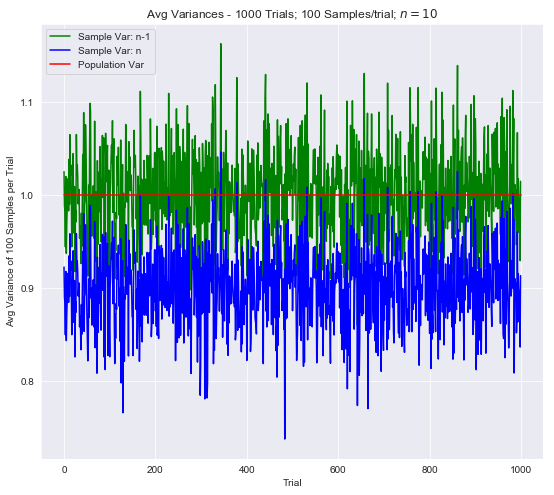

In [8]:
# Assumes population is standard normal distribution
mean = 0
std_dev = 1
sample_size = 10
samps_per_trial = 100
trials = 1000
trials_n = []
trials_n_1 = []
x = np.arange(trials)

# Take samples, calculate variance both ways
for t in range(trials):
    sample_vars_n = []
    sample_vars_n_1 = []
    for i in range(samps_per_trial):
        samp = np.random.normal(mean, std_dev, sample_size)
        sample_vars_n.append(np.var(samp, ddof=0))
        sample_vars_n_1.append(np.var(samp, ddof=1))

    trials_n.append(np.mean(sample_vars_n))
    trials_n_1.append(np.mean(sample_vars_n_1))


# Create plot
plt.figure(figsize=(9, 8))
plt.plot(x, trials_n_1, color='green', label='Sample Var: n-1')
plt.plot(x, trials_n, color='blue', label='Sample Var: n')
plt.plot(x, [std_dev**2]*len(x), color='red', label='Population Var')
plt.xlabel('Trial')
plt.ylabel('Avg Variance of {} Samples per Trial'.format(samps_per_trial))
plt.title(r'Avg Variances - {} Trials; {} Samples/trial; $n={}$'.format(trials, samps_per_trial, sample_size))
plt.legend()
plt.show()

## Probability Basics

Before digging into random variables and their distributions, laying out the basic definitions and math behind common probability problems is warranted.

Recall that probability theory is a branch of mathematics that's concerned with calculating the likelihood of outcomes of experiments. A classical interpretation of probability defines the probability of getting a favorable outcome $f$ out of $n$ *equally likely* ways as $p = \frac{f}{n}$. A **certain** event has a probability of $1$ and an event that will never happen has a probability of $0$ - probability can never be a negative number.

### Types of Probability Problems

The **counting rule** states that if one thing can be done $m$ ways, and afterwards something else can be done $n$ ways, then both things can be done in a total of $m \cdot n$ different ways in that order.

An example of a counting problem is: how many ways can you choose two letter (repetition is not allowed) followed by a digit? $26 \times 25 \times 10 = 6500$


A **permutation** is any arrangement of distinct objects in a particular order. For example, how many ways can you choose first, second, and third place in a science fair out of 10 entrants? $10 \times 9 \times 8 = 720$. The formula to find the number of permutations of $n$ things taken $r$ at a time is $P(n, k) = \frac{n!}{(n-r)!}$. Note that $n$ things taken $n$ at a time is $n!$.

When there's repetition, the formula changes slightly - you have $n$ things, but $p$ are alike, $q$ are alike, etc, so it's $\frac{n!}{p!q!r!\ldots}$. For example, the number of permutations of the letters in the word "SHELLS" is $\frac{6!}{2!2!1!1!}$ to account for the double "L"s and double "S"s.

A **combination** is a selection of a collection of distinct objects where order is not important. The number of different ways to select $k$ objects from a possible $n$ distinct objects, or $\left( \begin{array}{c} n \\ k \end{array} \right) = \frac{n!}{k!(n-k)!}$. For example, how many ways can you form a committee of three people out of five: $\left( \begin{array}{c} 5 \\ 3 \end{array} \right) = \frac{5!}{3!2!} = 10$.

## Random Variables and Their Probability Distributions

A **random variable** assigns a numerical value to each possible outcome of a random experiment, where the outcome depends on chance. Random variables can be **discrete** (has a number of outcomes you can count) or **continuous** (has outcomes that can take any real number). And **probability** measures the likelihood of a random variable to take on a specified range of outcomes.

The heart of inferential statistics is **probabilistic logic** - given a set of data, you describe probabilistically what you may expect if you acquired those data again. This is the bridge from measured results to probabilistic conclusions about what you might expect if you were to the collect data again. The goal is to make actionable decisions based on those conclusions.

### Discrete Random Variables

Discrete random variables have outcomes that are countable. The classic example is rolling a die, where the outcomes are 1, 2, 3, 4, 5, or 6. The notation $P(X=x)$ notes the probability that random variable $X$ will have outcome $x$.

| Outcome $x$ | Probability $p$ | $P(X=x) = p$<img width=120 /> |
| ------ | ------ | ------ |
| $x_1$ | $p_1$ | $P(X=1) = 1/6$ |
| $x_2$ | $p_2$ | $P(X=2) = 1/6$ |
| $\vdots$ | $\vdots$ | $\vdots$ |
| $x_6$ | $p_6$ | $P(X=6) = 1/6$ |

The table represents a **Probability Mass Function (PMF)** for a fair die random variable:

- $X$ is the random variable, here, the value on the die
- $x$ is an outcome, either 1, 2, 3, 4, 5, or 6
- $P(X=x)$ is the probability that $X$ will have outcome $x$
- the $p$'s for all outcomes must sum to $1$, but don't always have to be equal
- General formula for writing the probability $p$ for an outcome $x_n$ is $P(X=x_n) = p_n$
- Represented visually with outcomes along the $x$-axis and frequencies along the $y$-axis (a histogram)

PMFs are summarized with the following metrics:

| **Metric**<img width=100 /> | **Random Variables**<img width=400 />|
| ------- | :-------: |
| Mean (Expected Value) | $\text{E(X) or } \mu = \sum_i p_i x_i$ |
| Variance |$\text{Var(X) or } \sigma^2 = \sum_i p_i(x_i-\mu)^2$ |
| Standard Deviation | $\text{Std(X) or } \sigma = \sqrt{\sum_i p_i (x_i-\mu)^2}$ |
| Average Deviation | $\sum_i p_i|x_i-\mu|$ |
| Z-Score |$z = \frac{x-\mu}{\sigma}$ |

### Common Discrete Probability Distributions

A few common discrete probability distributions are summarized below.

#### Bernoulli Distribution

The **Bernoulli Distribution** is the probability distribution for an experiment with two possible outcomes: "success" (or true/on/1) and "failure" (or false/off/0). The success outcome has probability $p$, where $0 \le p \le 1$, and the failure outcome has probability $1 - p$. $X \sim Bernoulli(p)$:

| Outcome $x$ | Probability $p$ |
| ---- | ---- |
| $1$ | $p$ |
| $0$ | $1 - p$ |

#### Binomial Distribution

The **Binomial Distribution** is the probability distribution for $x$ number of success in a sequence of $n$ independent experiments (aka $n$ repeated Bernoulli trials), all having the probability $p$ of success. The mean or expected value $E(X) = np$ and the variance $Var(X) = np(1-p)$.

$$
P(X=x) = \frac{n!}{x!(n-x)!} * p^x * (1-p)^{n-x}
$$

#### Poisson Distribution

The **Poisson Distribution** is the probability distribution for $x$ number of independent events occuring in a continuous interval with a known rate of $\lambda$ representing the average number of events that occur per interval. The expected value $E(X) = \lambda$ and the variance $Var(X) = \lambda$.

$$
X \sim Pois(\lambda): P(X=x) = \frac{e^{-\lambda} \lambda^x}{x!}\text{, }x=0, 1, 2 \ldots
$$

### Continuous Random Variables

**Continuous random variables** have outcomes that can take on values of any real number, in other words, they aren't countable. A **probability density function (PDF)** is a way to represent a continuous probability distribution's probability. The area under the PDF represents the probabilities, and the total area integrates to $1$.

The **Cumulative Distribution Function (CDF)** shows you the probability for random variable $x$ to be below a certain value, or $F(X)=P(X<=x)$. If you need a probability for $x$ within a range, you can use subtraction. If you need the probability for $x$ above a certain value, subtract the CDF value for that $x$ from $1$. An **Empirical CDF** is when you calculate a CDF for a sample of data.

In [9]:
def ecdf(data):
    """
    Computes the Empirical Cumulative Distribution Function for a one-dimensional
        array of measurements
    
    :param data: one-dimensional array (or array-like object) of measurements
    :return: tuple of x, y arrays (of same length as `data`)
        `x` holds sorted measurements from `data`
        `y` holds equally-spaced values from 0 to 1
    
    >>> x, y = ecdf(myData)
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

<Figure size 432x288 with 0 Axes>

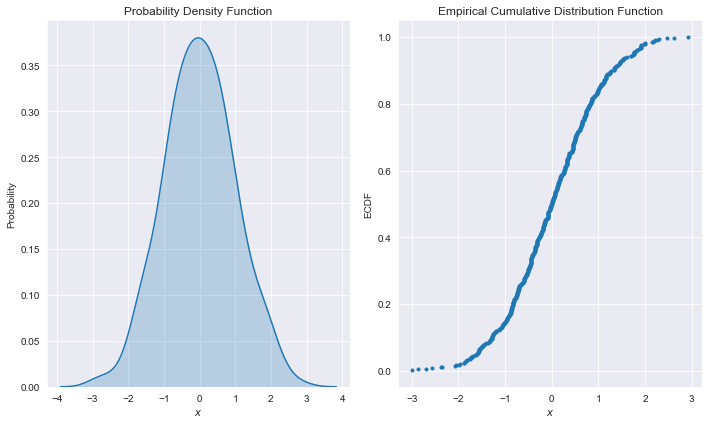

In [15]:
# Example of a PDF and ECDF for a sample of the standard normal distribution

samp = np.random.normal(size=500)
x, y = ecdf(samp)

# Create subplots for PDF and ECDF
plt.figure()
plt.subplots(1, 2, figsize=(10, 6))

# PDF of samples
plt.subplot(1, 2, 1)
sns.kdeplot(samp, shade=True)
plt.title('Probability Density Function')
plt.xlabel(r'$x$')
plt.ylabel('Probability')

# ECDF of samples
plt.subplot(1, 2, 2)
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Empirical Cumulative Distribution Function')
plt.xlabel(r'$x$')
plt.ylabel('ECDF')

plt.tight_layout()
plt.show()

### Common Continuous Probability Distributions

A couple common continuous probability distributions are summarized below.

#### Normal Distribution

The **Normal Distribution** (or Gaussian Distribution) is the most well-known of any probability distribution and happens to model natural phenomena in many different capacities. It's described by two parameters: the mean $\mu$ and the variance $\sigma^2$, where variance is the square of the standard deviation $\sigma$.

$$
{\mathcal {N}}(\mu ,\sigma ^{2}) = 	
{\displaystyle {\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}
$$

A special version of the Normal Distribution, where the mean is $0$ and standard deviation is $1$ is called the **Standard Normal Distribution**.

Normal distributions have $68$% probability of a data point falling within $\pm 1$ standard deviation, $95$% probability falling within $\pm 2$ standard deviations, and $99.7$% probability falling within $\pm 3$ standard deviations.

The Normal Distribution is useful because of the **Central Limit Theorem**. This states that if you take large random samples of size $n$ (usually $n \gt 30$) from a population with mean $\mu$ and standard deviation $\sigma$, and compute a sample mean $\bar{x}$ for each sample, the following three facts hold:

1. The distribution of the sample means will be approximately normal
2. The mean of the sampling distribution will be equal to the mean of the population, or $\mu_{\bar{x}} = \mu$
3. The standard deviation of the sampling distribution will be equal to the standard deviation of the population divided by the suare root of the number of items in each sample, or $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$. This is also called the **standard error** for the sample

#### Exponential Distribution

The **Exponential Distribution** is the probability distribution for the waiting time between events or arrivals in a Poisson process, where the arrivals are independent from each other. The parameter $\lambda$ is the mean waiting time.

$$
 f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}
$$